In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential 
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tmp = []
i = 1
a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i) + '.npy')
b = np.concatenate((a[:,:10],a[:,50:60],a[:,100:110],a[:,150:160]),axis = 1)
ll = np.reshape(b,(40,30,116,116))

for i in range(2,25):
# i = 1
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i) + '.npy')
  b = np.concatenate((a[:,:10],a[:,50:60],a[:,100:110],a[:,150:160]),axis = 1)
  c = np.reshape(b,(40,30,116,116))
  ll = np.concatenate((ll,c), axis = 0)
  # tmp.append(c)
# print(b[0,0,0,:10])
# print(c[0,0,0,:10])

In [ ]:
print(len(tmp))
label = np.zeros((40,1))
for i in range(10):
  label[i] = 1
Label = label
# Label = label * 24
# print(label[5:11])
for i in range(0,23):
  Label = np.concatenate((Label,label),axis = 0)

print(Label.shape)

0
(960, 1)


In [ ]:
# print(ll.shape)
ll = np.reshape(ll,(960, 30, 116, 116, 1))

In [ ]:
data, label = shuffle(ll,Label,random_state = 10)

In [ ]:
train_data = data[:672]
test_data = data[672:]
train_label  = label[:672]
test_label = label[672:]
print(train_data.shape)
print(train_label.shape)

(672, 30, 116, 116, 1)
(672, 1)


In [ ]:
# data = Original_pre[:]
data = train_data[:]
label = train_label[:]
k = 4
num_val_samples = len(data)//k
Loss = []
Acc = []
val_Loss = []
val_Acc = []

# for i in range(k):
for i in range(k):

  print('processing fold #', i)
  val_d = data[i * num_val_samples: (i + 1) * num_val_samples]
  val_l = label[i * num_val_samples: (i + 1) * num_val_samples]
  train_d = np.concatenate([data[:i * num_val_samples],data[(i + 1) * num_val_samples:]], axis=0)
  train_l = np.concatenate([label[:i * num_val_samples],label[(i + 1) * num_val_samples:]], axis=0)
  # train_data = np.reshape(train_data,(960,30,116,116,1))
  # test_data = np.reshape(test_data,(240,30,116,116,1))
  model = Model1()  
  history = model.fit(train_d, train_l, epochs=num_epochs, batch_size=batchsize, verbose=0, validation_data= (val_d,val_l))
  loss = history.history['loss']
  acc = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  average_loss = np.mean(loss)
  average_acc = np.mean(acc)
  average_val_loss = np.mean(val_loss)
  average_val_acc = np.mean(val_acc)

  Loss.append(average_loss)
  Acc.append(average_acc)
  val_Loss.append(average_val_loss)
  val_Acc.append(average_val_acc)





processing fold # 0
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_117 (Conv3D)          (None, 28, 114, 114, 16)  448       
_________________________________________________________________
max_pooling3d_91 (MaxPooling (None, 14, 57, 57, 16)    0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 14, 57, 57, 16)    64        
_________________________________________________________________
dropout_95 (Dropout)         (None, 14, 57, 57, 16)    0         
_________________________________________________________________
conv3d_118 (Conv3D)          (None, 12, 55, 55, 32)    13856     
_________________________________________________________________
max_pooling3d_92 (MaxPooling (None, 6, 27, 27, 32)     0         
_________________________________________________________________
batch_normalization_111 (Bat (Non

In [ ]:
print('Loss:',np.mean(Loss))
print('Acc:',np.mean(Acc))
print('val_loss:',np.mean(val_Loss))
print('val_acc:',np.mean(val_Acc))


Loss: 0.2414773334811131
Acc: 0.8990476195017497
val_loss: 0.9049340742826462
val_acc: 0.747956353922685


In [ ]:
model.evaluate(test_data, test_label, verbose=0) 

[1.085015892982483, 0.7326388955116272]

# 模型1

In [ ]:
def Model1():
  initializer = tf.keras.initializers.he_normal
  model = Sequential()
  model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', kernel_initializer=initializer, input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer=initializer))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # model.add(Conv3D(32, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = Adam(learning_rate=0.00005),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model




In [ ]:
num_epochs = 100
batchsize = 64
model = Model1()
history = model.fit(train_data[:], train_label[:], epochs=num_epochs,
                    batch_size=batchsize, verbose=1)
# ,validation_data=(train_data[538:], train_label[538:]))

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_129 (Conv3D)          (None, 28, 114, 114, 16)  448       
_________________________________________________________________
max_pooling3d_103 (MaxPoolin (None, 14, 57, 57, 16)    0         
_________________________________________________________________
batch_normalization_122 (Bat (None, 14, 57, 57, 16)    64        
_________________________________________________________________
dropout_107 (Dropout)        (None, 14, 57, 57, 16)    0         
_________________________________________________________________
conv3d_130 (Conv3D)          (None, 12, 55, 55, 32)    13856     
_________________________________________________________________
max_pooling3d_104 (MaxPoolin (None, 6, 27, 27, 32)     0         
_________________________________________________________________
batch_normalization_123 (Bat (None, 6, 27, 27, 32)   

[1.5243151187896729, 0.7291666865348816]

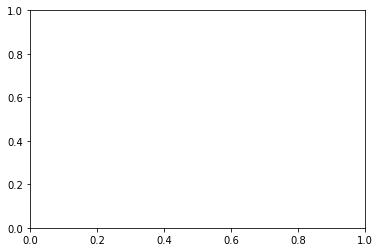

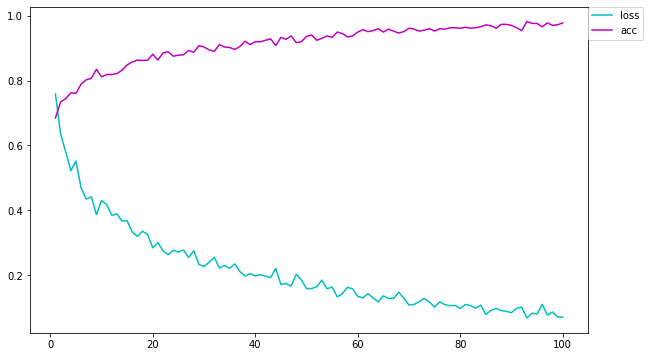

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

# val_loss = history.history['val_loss']
# val_acc = history.history['val_accuracy']
plt.ylim([0, 1])
plt.figure(figsize=(10,6))
epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'c', label='loss')
plt.plot(epochs, acc, 'm', label='acc')
# plt.plot(epochs, val_loss, 'c-.', label='val_loss')
# plt.plot(epochs, val_acc, 'm-.', label='val_acc')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/content/drive/My Drive/images/patient_or_not/final.png' ,dpi=800)

model.evaluate(test_data, test_label, verbose=0)  #Returns the loss value & metrics values for the model in test mode.

# 模型2

In [ ]:
def Model2():
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  model.add(Conv3D(128, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Conv3D(64, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

num_epochs = 50
batchsize = 6
model = Model2()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 29, 114, 114, 32)  608       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 14, 57, 57, 32)    0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 57, 57, 32)    128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 57, 57, 32)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 13, 55, 55, 64)    36928     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 6, 27, 27, 64)     0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 27, 27, 64)    

[0.901306688785553, 0.5333333611488342]

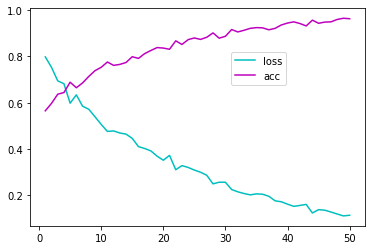

In [ ]:
mse_history = history.history['loss']
mae_history = history.history['accuracy']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='loss')
plt.plot(epochs, mae_history, 'm', label='acc')
plt.legend(bbox_to_anchor=(0.6, 0.8), loc='upper left', borderaxespad=0.)

plt.savefig('/content/drive/My Drive/images/2.png' ,dpi=1200)

model.evaluate(test_data, test_label, verbose=0)  #Returns the loss value & metrics values for the model in test mode.

# 模型3


In [ ]:
def Model3():
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

num_epochs = 30
batchsize = 30test
model = Model3()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 29, 114, 114, 32)  608       
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 14, 57, 57, 32)    0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 57, 57, 32)    128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 57, 57, 32)    0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 13, 55, 55, 64)    36928     
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 6, 27, 27, 64)     0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 6, 27, 27, 64)    

[0.11127296835184097, 0.949999988079071]

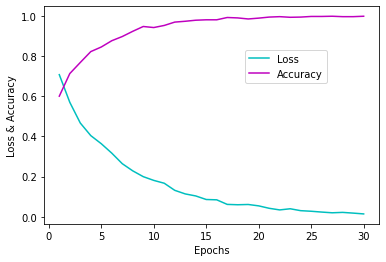

In [ ]:
mse_history = history.history['loss']
mae_history = history.history['accuracy']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='Loss')
plt.plot(epochs, mae_history, 'm', label='Accuracy')
plt.legend(bbox_to_anchor=(0.6, 0.8), loc='upper left', borderaxespad=0.)

plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.savefig('/content/drive/My Drive/images/3.png' ,dpi=1200)

model.evaluate(test_data, test_label, verbose=0)  #Returns the loss value & metrics values for the model in test mode.

# 模型4

In [ ]:
def Model4():
  model = Sequential()
  model.add(Conv3D(16, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  model.add(Conv3D(16, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  # model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  # model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

num_epochs = 30
batchsize = 6
model = Model4()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 29, 114, 114, 16)  304       
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 14, 57, 57, 16)    0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 14, 57, 57, 16)    64        
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 57, 57, 16)    0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 13, 55, 55, 32)    9248      
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 6, 27, 27, 32)     0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 6, 27, 27, 32)    

[0.11127296835184097, 0.949999988079071]

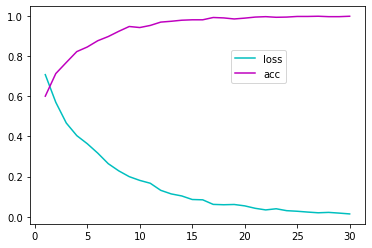

In [ ]:
mse_history = history.history['loss']
mae_history = history.history['accuracy']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='loss')
plt.plot(epochs, mae_history, 'm', label='acc')
plt.legend(bbox_to_anchor=(0.6, 0.8), loc='upper left', borderaxespad=0.)

plt.savefig('/content/drive/My Drive/images/4.png' ,dpi=1200)

model.evaluate(test_data, test_label, verbose=0)  #Returns the loss value & metrics values for the model in test mode.

#最后

In [ ]:
# PPP = [] 

# p1 = [mse_history,mae_history]
# p2 = [mse_history,mae_history]
p3 = [mse_history,mae_history]